<a href="https://colab.research.google.com/github/sudip234-source/Time-Series-Analysis/blob/main/End_to_End_Time_series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
berkeleyearth_climate_change_earth_surface_temperature_data_path = kagglehub.dataset_download('berkeleyearth/climate-change-earth-surface-temperature-data')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
temp_df = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')
temp_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
temp_df.dropna(inplace=True)

In [ ]:
temp_df.Country.value_counts()[:10]

Country
India             960548
China             819132
United States     661524
Brazil            451645
Russia            448663
Japan             356467
Indonesia         273295
Germany           256446
United Kingdom    215288
Mexico            208020
Name: count, dtype: int64

In [ ]:
df_den = temp_df[temp_df.Country == 'Denmark']
df_den.index = pd.to_datetime(df_den.dt)
df_den.drop(['dt','AverageTemperatureUncertainty'],axis=1,inplace=True)
df_den.describe()

/tmp/ipykernel_104/2249511961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_den.drop(['dt','AverageTemperatureUncertainty'],axis=1,inplace=True)


,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [ ]:
ts = df_den.AverageTemperature
ts = pd.DataFrame(ts)

In [ ]:
ts.head()

,AverageTemperature
dt,
1743-11-01,6.068
1744-04-01,5.788
1744-05-01,10.644
1744-06-01,14.051
1744-07-01,16.082


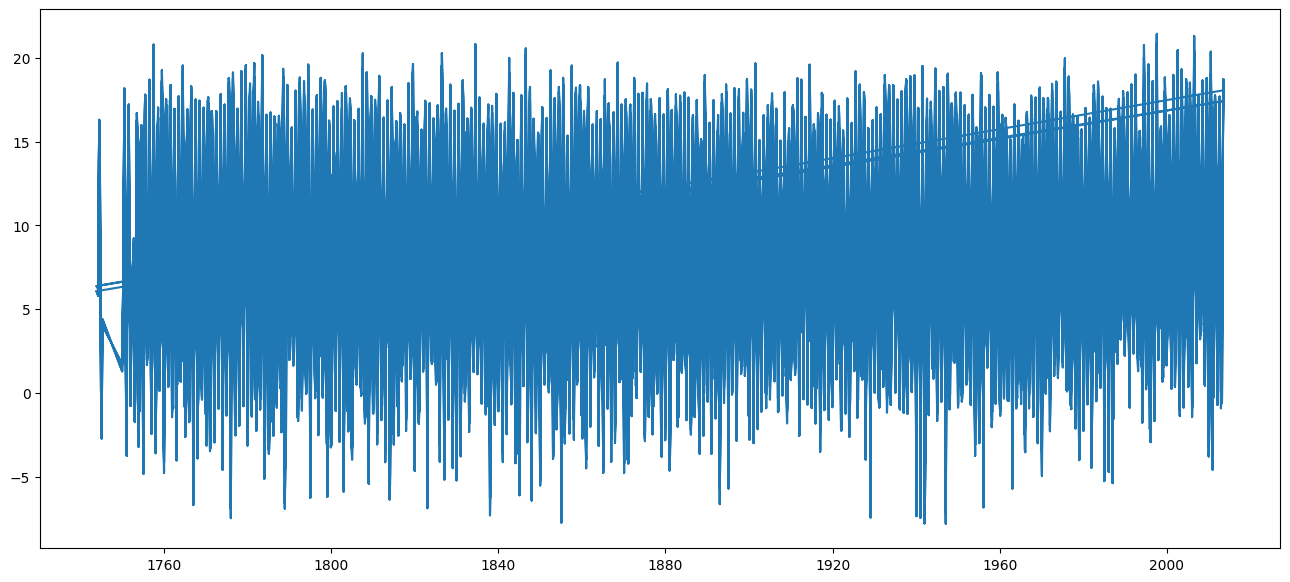

In [ ]:
plt.figure(figsize=(16,7))
plt.plot(ts.AverageTemperature)
plt.show()

In [ ]:
ts.shape

(12664, 1)

**Now We perform ADF Test (Augmented Dickey-Fuller test)
to check the stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts,autolag='AIC')
print(f'ADF statistic = {adf[0]}')
print(f'p-value = {adf[1]}')

for key,value in adf[4].items():
    print('Critical Values : ')
    print(key,' ', value)

ADF statistic = -14.764430391800639
p-value = 2.374697045635711e-27
Critical Values : 
1%   -3.430868192869495
Critical Values : 
5%   -2.86176901566292
Critical Values : 
10%   -2.566891900059256


here p-value << 0.05

so we reject Null Hypothesis

/tmp/ipykernel_104/1481235228.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts = df_dk['AverageTemperature'].resample('M').mean()


ADF Statistic: -7.092487284666845
p-value: 4.37376114228987e-10
                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                 3239
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8278.697
Date:                Tue, 03 Jun 2025   AIC                          16563.394
Time:                        09:54:35   BIC                          16581.642
Sample:                    11-30-1743   HQIC                         16569.932
                         - 09-30-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5841      0.026     22.223      0.000       0.533       0.636
ma.L1         -0.0232      0.031     -0.738      0.461      -0.085 

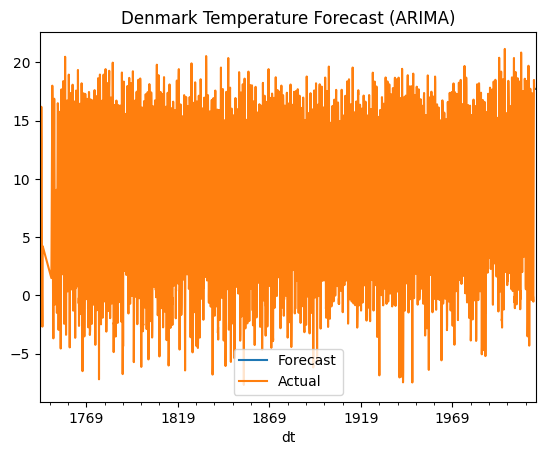

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Step 2: Load the dataset
df = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')

# Step 3: Filter for Denmark
df_dk = df[df['Country'] == 'Denmark'].copy()

# Step 4: Convert date and sort
df_dk['dt'] = pd.to_datetime(df_dk['dt'])
df_dk = df_dk.sort_values('dt')

# Step 5: Set date as index
df_dk.set_index('dt', inplace=True)

# Step 6: Resample monthly average temperature
ts = df_dk['AverageTemperature'].resample('M').mean()

# Step 7: Handle missing values
ts = ts.interpolate()  # linear interpolation

# Optional: Check stationarity (ADF Test)
adf_result = adfuller(ts.dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
# If p > 0.05 → not stationary → differencing needed

# Step 8: Fit ARIMA model (example: ARIMA(1,1,1))
model = ARIMA(ts, order=(1, 1, 1))
model_fit = model.fit()

# Step 9: Summary
print(model_fit.summary())

# Step 10: Forecast the next 12 months
forecast = model_fit.forecast(steps=12)
forecast.plot(label='Forecast', legend=True)
ts.plot(label='Actual', legend=True)
plt.title('Denmark Temperature Forecast (ARIMA)')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error
train = ts[:-12]
test = ts[-12:]

mae = mean_absolute_error(test, forecast)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 9.436869003085157


In [ ]:
import warnings
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data (use last 12 points as test set)
train = ts[:-12]
test = ts[-12:]

# Define p, d, q ranges
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_score, best_cfg = float("inf"), None

warnings.filterwarnings("ignore")

# Grid search
for order in pdq:
    try:
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=12)
        mse = mean_squared_error(test, forecast)
        if mse < best_score:
            best_score, best_cfg = mse, order
        print(f"ARIMA{order} MSE = {mse:.2f}")
    except:
        continue

print(f"\n✅ Best ARIMA order: {best_cfg} with MSE = {best_score:.2f}")



ARIMA(0, 0, 0) MSE = 55.97
ARIMA(0, 0, 1) MSE = 56.37
ARIMA(0, 0, 2) MSE = 55.72
ARIMA(0, 1, 0) MSE = 81.99
ARIMA(0, 1, 1) MSE = 70.14
ARIMA(0, 1, 2) MSE = 58.27
ARIMA(0, 2, 0) MSE = 745.93
ARIMA(0, 2, 1) MSE = 449.90
ARIMA(0, 2, 2) MSE = 886.79
ARIMA(1, 0, 0) MSE = 70.89
ARIMA(1, 0, 1) MSE = 64.97
ARIMA(1, 0, 2) MSE = 58.73
ARIMA(1, 1, 0) MSE = 59.92
ARIMA(1, 1, 1) MSE = 60.31
ARIMA(1, 1, 2) MSE = 64.92
ARIMA(1, 2, 0) MSE = 473.62
ARIMA(1, 2, 1) MSE = 565.20
ARIMA(1, 2, 2) MSE = 1049.83
ARIMA(2, 0, 0) MSE = 34.90
ARIMA(2, 0, 1) MSE = 6.74
ARIMA(2, 0, 2) MSE = 4.70
ARIMA(2, 1, 0) MSE = 60.77
ARIMA(2, 1, 1) MSE = 62.02
ARIMA(2, 1, 2) MSE = 4.17
ARIMA(2, 2, 0) MSE = 691.32
ARIMA(2, 2, 1) MSE = 60.77
ARIMA(2, 2, 2) MSE = 930.44

✅ Best ARIMA order: (2, 1, 2) with MSE = 4.17


In [ ]:
final_model = ARIMA(ts, order=best_cfg)
final_model_fit = final_model.fit()
print(final_model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                 3239
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6752.315
Date:                Tue, 03 Jun 2025   AIC                          13514.629
Time:                        10:06:52   BIC                          13545.043
Sample:                    11-30-1743   HQIC                         13525.526
                         - 09-30-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7312      0.001   2270.039      0.000       1.730       1.733
ar.L2         -0.9988      0.001  -1327.398      0.000      -1.000      -0.997
ma.L1         -1.7333      0.004   -385.791      0.0

In [ ]:
mean_absolute_error(test,final_model_fit.forecast(steps=12))


3.542397782678679

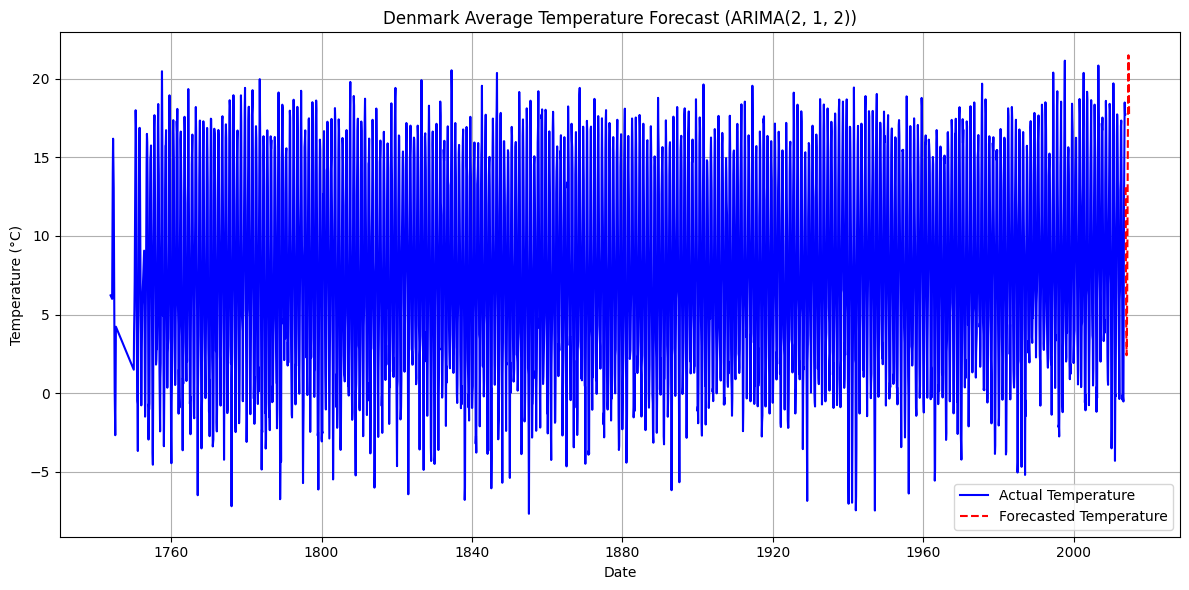

In [ ]:
import matplotlib.pyplot as plt

# Forecast the next 12 months
forecast = final_model_fit.forecast(steps=12)

# Create time index for forecast
forecast_index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Plot actual and forecast
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Actual Temperature', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Temperature', color='red', linestyle='--')
plt.title(f'Denmark Average Temperature Forecast (ARIMA{best_cfg})')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
forecast

2013-10-31    13.102328
2013-11-30     8.163553
2013-12-31     4.250754
2014-01-31     2.409835
2014-02-28     3.130956
2014-03-31     6.218024
2014-04-30    10.842006
2014-05-31    15.763563
2014-06-30    19.665223
2014-07-31    21.504053
2014-08-31    20.790444
2014-09-30    17.718466
Freq: ME, Name: predicted_mean, dtype: float64